<a href="https://colab.research.google.com/github/shimjide123/datman/blob/main/ps5_by_Yu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
import seaborn as sns
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

#1st Project:

Exploring interaction between poverty, food insecurity, unemployment, and voter turnout in 2022

##Research question: how does socioeconomic disadvantage affect voter turnout in general election in 2022?

### According to Maslow (1943, 1954), human needs were arranged in a hierarchy, with survival needs at the bottom, and needs to pursue development and self-achievement at the higher level.

People are motivatied to pursue the needs at the higher level only if the needs for survival are met.

Socioeconomic disadvantage like food insecurity concerns the basic needs for survival. Voting for ideal candidates concerns the need for political participation, which helps to fulfil the high-level need to pursue development and social support.

**My assumption: the struggle to fulfill basic needs can unmotivate voters from voting, to some extent**

##Selected datasets:

Poverty rates by state 2022:https://www.statista.com/statistics/233093/us-poverty-rate-by-state/
Unemployment rates by state 2022:https://www.statista.com/statistics/223675/state-unemployment-rate-in-the-us/
Food insecurity rates by state 2022: https://www.ers.usda.gov/topics/food-nutrition-assistance/food-security-in-the-u-s/key-statistics-graphics/
Voter turnout rate by state 2022: https://www.electproject.org/election-data/voter-turnout-data


##Independent variables: Poverty rates, Food insecurity rates, and Unemployment rates by state

In [ ]:
poverty=pd.read_excel("https://github.com/shimjide123/datman/raw/main/us-poverty-rate-2022-by-state.xlsx")

In [ ]:
poverty.head()

State  Poverty rate
0  United States          11.5
1     New Mexico          18.2
2    Mississippi          17.8
3      Louisiana          16.9
4       Arkansas          15.9

In [ ]:
food=pd.read_excel("https://github.com/shimjide123/datman/raw/main/mapdata2022.xlsx")

In [ ]:
food.head()

State  Food insecurity rate              Very low food security rate
0  U.S.                              11.2                          4.3
1    AK                               9.5                          4.2
2    AL                              12.4                          4.7
3    AR                              16.6                          6.5
4    AZ                              10.2                          4.0

In [ ]:
unemployment=pd.read_excel("https://github.com/shimjide123/datman/raw/main/statistic_id223675_us-annual-unemployment-rate-2022-by-state.xlsx")

In [ ]:
unemployment.head()

State  Unemployment rate
0                Nevada                5.4
1  District of Columbia                4.7
2              Illinois                4.6
3              Delaware                4.5
4          Pennsylvania                4.4

## Dependent variable: voter turnout 2022

In [ ]:
Turnout=pd.read_excel("https://github.com/shimjide123/datman/raw/main/2022%20November%20General%20Election(1).xlsx")

In [ ]:
Turnout.head()

State  Preliminary Total Turnout Estimate  \
0  United States                           112030874   
1       Alabama*                             1424087   
2         Alaska                              267047   
3        Arizona                             2592313   
4       Arkansas                              914227   

   Preliminary Turnout Rate  Voting-Eligible Population (VEP)  \
0                  0.461620                         242690810   
1                  0.372797                           3820009   
2                  0.502489                            531448   
3                  0.493110                           5257070   
4                  0.415133                           2202252   

   Voting-Age Population (VAP)   Prison   Probation  Parole  \
0                    261673203  1157707  1145315.13  340972   
1                      3977770    25328    32710.83    8245   
2                       558308     4578     1682.22    1003   
3                      5806140    34997    50332.74    6887   
4                      2357190    15850    27510.99   25852   

   Total Ineligible Felon State Abv  
0              2643994.13      U.S.  
1                66283.83        AL  
2                 7263.22        AK  
3                92216.74        AZ  
4                69212.99        AR

##merge

Here I merge datasets of unemployment rate and voter turnout just as an example, later I will merge all 4 datasets

In [ ]:
Turnout_unemployment=pd.merge(Turnout,unemployment, how='outer',indicator=True, on='State')

In [ ]:
Turnout_unemployment['_merge'].value_counts()

both          39
left_only     13
right_only    12
Name: _merge, dtype: int64

In [ ]:
Turnout_unemployment.query("_merge=='left_only'")

State  Preliminary Total Turnout Estimate  \
0   United States                         112030874.0   
1        Alabama*                           1424087.0   
13         Idaho*                            595350.0   
17        Kansas*                           1008998.0   
25   Mississippi*                            709100.0   
26      Missouri*                           2304250.0   
37      Oklahoma*                           1153284.0   
39  Pennsylvania*                           5410022.0   
40  Rhode Island*                            361449.0   
42  South Dakota*                            354670.0   
43     Tennessee*                           1756397.0   
44         Texas*                           8151590.0   
50     Wisconsin*                           2673154.0   

    Preliminary Turnout Rate  Voting-Eligible Population (VEP)  \
0                   0.461620                       242690810.0   
1                   0.372797                         3820009.0   
13                  0.425940                         1397732.0   
17                  0.475663                         2121246.0   
25                  0.324705                         2183828.0   
26                  0.496337                         4642509.0   
37                  0.395864                         2913333.0   
39                  0.543539                         9953327.0   
40                  0.436272                          828495.0   
42                  0.530641                          668380.0   
43                  0.333257                         5270397.0   
44                  0.418052                        19499000.0   
50                  0.598370                         4467396.0   

    Voting-Age Population (VAP)     Prison   Probation    Parole  \
0                   261673203.0  1157707.0  1145315.13  340972.0   
1                     3977770.0    25328.0    32710.83    8245.0   
13                    1490206.0     7996.0    18918.42    5967.0   
17                    2251251.0     8477.0    10953.06    5428.0   
25                    2263618.0    17569.0    20026.56   10510.0   
26                    4822855.0    22890.0    26736.81   20729.0   
37                    3080502.0    22071.0    15888.63    2237.0   
39                   10366708.0    38938.0        0.00       0.0   
40                     890835.0     2227.0        0.00       0.0   
42                     695896.0     3176.0     5209.50    3673.0   
43                    5539421.0    22205.0    41779.50   12407.0   
44                   22746809.0   128653.0   230703.57  110437.0   
50                    4655496.0    19846.0    26485.65   23174.0   

    Total Ineligible Felon State Abv  Unemployment rate     _merge  
0               2643994.13      U.S.                NaN  left_only  
1                 66283.83        AL                NaN  left_only  
13                32881.42        ID                NaN  left_only  
17                24858.06        KS                NaN  left_only  
25                48105.56        MS                NaN  left_only  
26                70355.81        MO                NaN  left_only  
37                40196.63        OK                NaN  left_only  
39                38938.00        PA                NaN  left_only  
40                 2227.00        RI                NaN  left_only  
42                12058.50        SD                NaN  left_only  
43                76391.50        TN                NaN  left_only  
44               469793.57        TX                NaN  left_only  
50                69505.65        WI                NaN  left_only

In [ ]:
Turnout_unemployment.query("_merge=='right_only'")

State  Preliminary Total Turnout Estimate  \
52  Pennsylvania                                 NaN   
53         Texas                                 NaN   
54   Mississippi                                 NaN   
55     Tennessee                                 NaN   
56  Rhode Island                                 NaN   
57      Oklahoma                                 NaN   
58     Wisconsin                                 NaN   
59        Kansas                                 NaN   
60         Idaho                                 NaN   
61       Alabama                                 NaN   
62      Missouri                                 NaN   
63  South Dakota                                 NaN   

    Preliminary Turnout Rate  Voting-Eligible Population (VEP)  \
52                       NaN                               NaN   
53                       NaN                               NaN   
54                       NaN                               NaN   
55                       NaN                               NaN   
56                       NaN                               NaN   
57                       NaN                               NaN   
58                       NaN                               NaN   
59                       NaN                               NaN   
60                       NaN                               NaN   
61                       NaN                               NaN   
62                       NaN                               NaN   
63                       NaN                               NaN   

    Voting-Age Population (VAP)  Prison  Probation  Parole  \
52                          NaN     NaN        NaN     NaN   
53                          NaN     NaN        NaN     NaN   
54                          NaN     NaN        NaN     NaN   
55                          NaN     NaN        NaN     NaN   
56                          NaN     NaN        NaN     NaN   
57                          NaN     NaN        NaN     NaN   
58                          NaN     NaN        NaN     NaN   
59                          NaN     NaN        NaN     NaN   
60                          NaN     NaN        NaN     NaN   
61                          NaN     NaN        NaN     NaN   
62                          NaN     NaN        NaN     NaN   
63                          NaN     NaN        NaN     NaN   

    Total Ineligible Felon State Abv  Unemployment rate      _merge  
52                     NaN       NaN                4.4  right_only  
53                     NaN       NaN                3.9  right_only  
54                     NaN       NaN                3.9  right_only  
55                     NaN       NaN                3.4  right_only  
56                     NaN       NaN                3.2  right_only  
57                     NaN       NaN                3.0  right_only  
58                     NaN       NaN                2.9  right_only  
59                     NaN       NaN                2.7  right_only  
60                     NaN       NaN                2.7  right_only  
61                     NaN       NaN                2.6  right_only  
62                     NaN       NaN                2.5  right_only  
63                     NaN       NaN                2.1  right_only

In [ ]:
Turnout.loc[Turnout['State']=='Alabama*','State']='Alabama'
Turnout.loc[Turnout['State']=='Missouri*','State']='Missouri'
Turnout.loc[Turnout['State']=='Idaho*','State']='Idaho'
Turnout.loc[Turnout['State']=='Kansas*','State']='Kansas'
Turnout.loc[Turnout['State']=='Mississippi*','State']='Mississippi'
Turnout.loc[Turnout['State']=='Oklahoma*','State']='Oklahoma'
Turnout.loc[Turnout['State']=='Pennsylvania*','State']='Pennsylvania'
Turnout.loc[Turnout['State']=='Rhode Island*','State']='Rhode Island'
Turnout.loc[Turnout['State']=='South Dakota*','State']='South Dakota'
Turnout.loc[Turnout['State']=='Tennessee*','State']='Tennessee'
Turnout.loc[Turnout['State']=='Texas*','State']='Texas'
Turnout.loc[Turnout['State']=='Wisconsin*','State']='Wisconsin'

 #at the later stage I will do all of the replace on condition

In [ ]:
turnout_unemployment=pd.merge(Turnout,unemployment, how='outer',indicator=True, on='State')

In [ ]:
turnout_unemployment['_merge'].value_counts() #only the voter turnout dataset shows an average figure in the US, thats why it does not merge

both          51
left_only      1
right_only     0
Name: _merge, dtype: int64

In [ ]:
turnout_unemployment.head()

State  Preliminary Total Turnout Estimate  \
0  United States                           112030874   
1        Alabama                             1424087   
2         Alaska                              267047   
3        Arizona                             2592313   
4       Arkansas                              914227   

   Preliminary Turnout Rate  Voting-Eligible Population (VEP)  \
0                  0.461620                         242690810   
1                  0.372797                           3820009   
2                  0.502489                            531448   
3                  0.493110                           5257070   
4                  0.415133                           2202252   

   Voting-Age Population (VAP)   Prison   Probation  Parole  \
0                    261673203  1157707  1145315.13  340972   
1                      3977770    25328    32710.83    8245   
2                       558308     4578     1682.22    1003   
3                      5806140    34997    50332.74    6887   
4                      2357190    15850    27510.99   25852   

   Total Ineligible Felon State Abv  Unemployment rate     _merge  
0              2643994.13      U.S.                NaN  left_only  
1                66283.83        AL                2.6       both  
2                 7263.22        AK                4.0       both  
3                92216.74        AZ                3.8       both  
4                69212.99        AR                3.3       both

##Plotting and regression

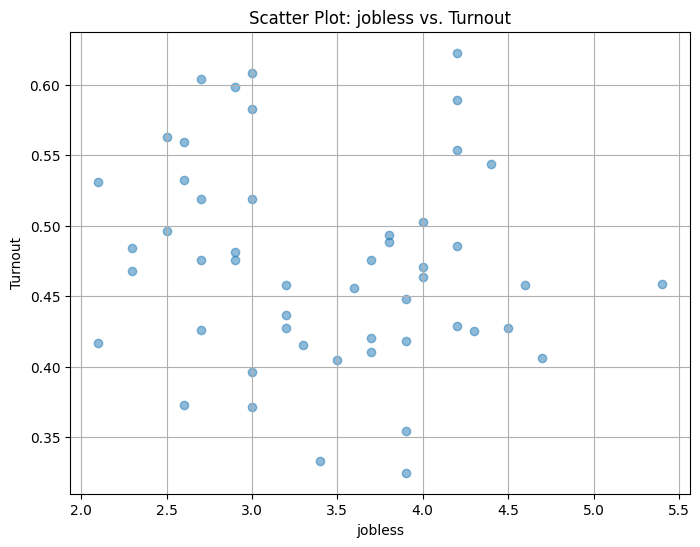

In [ ]:
import matplotlib.pyplot as plt

Turnout = turnout_unemployment['Preliminary Turnout Rate']
jobless = turnout_unemployment['Unemployment rate']

plt.figure(figsize=(8, 6))
plt.scatter(jobless,Turnout,alpha=0.5)
plt.title('Scatter Plot: jobless vs. Turnout')
plt.xlabel('jobless')
plt.ylabel('Turnout')
plt.grid(True)
plt.show()
#after merging all the 4 datasets I plot it again!

In [ ]:
import seaborn as sns

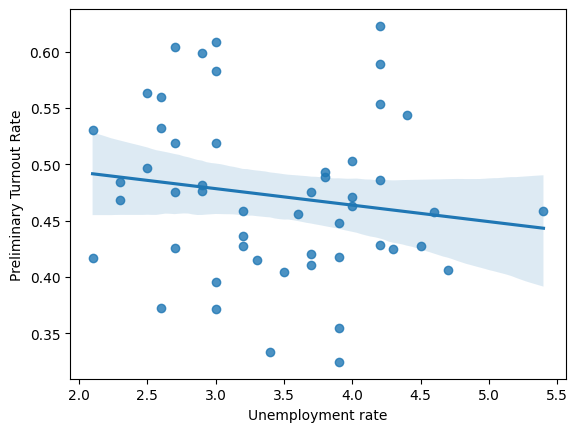

In [ ]:
sns.regplot(x=turnout_unemployment['Unemployment rate'], y=turnout_unemployment['Preliminary Turnout Rate']);
#after merging all the 4 datasets I will do another multiple regression plot

In [ ]:
#this is the multiple regression code I aim to use for the next, I will adjust it for the datasets I used later
import pandas
from sklearn import linear_model

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)


#predict the CO2 emission of a car where the weight is 2300g, and the volume is 1300ccm:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)


# 2nd project: exploring the interaction between quality of governance, people's happiness, and political unrests in the west sahel region of west africa.

## research questions:

1. how does governance affect people's happiness in west sahel region of africa?

2. Whether people's unhappiness contributes to political unrests in west sahel region of africa?

## choosen datasets:

Freqencies of local terrorist activities by country:https://www.visionofhumanity.org/public-release-data/

World Happiness index 2023: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023

Global positvie peace index: https://www.visionofhumanity.org/public-release-data/ (it contains a lot of variables about quality of governance)


## for the 1st research question:

independent variable: quality of governance

dependent variable: people's happiness

In [2]:
Happiness=pd.read_csv('https://github.com/shimjide123/datman/raw/main/WHR_2023.csv')

In [3]:
Happiness.head() #here includes all countries, later I will reduce the obs to only the 11 countries in west sahel region

country                        region  happiness_score  gdp_per_capita  \
0      Finland                Western Europe            7.804           1.888   
1      Denmark                Western Europe            7.586           1.949   
2      Iceland                Western Europe            7.530           1.926   
3       Israel  Middle East and North Africa            7.473           1.833   
4  Netherlands                Western Europe            7.403           1.942   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0           1.585                    0.535                         0.772   
1           1.548                    0.537                         0.734   
2           1.620                    0.559                         0.738   
3           1.521                    0.577                         0.569   
4           1.488                    0.545                         0.672   

   generosity  perceptions_of_corruption  
0       0.126                      0.535  
1       0.208                      0.525  
2       0.250                      0.187  
3       0.124                      0.158  
4       0.251                      0.394

In [7]:
Governance=pd.read_excel('https://github.com/shimjide123/datman/raw/main/PPI-2022.xlsx')

In [8]:
Governance.head() #here includes all countries, later I will reduce the obs to only the 11 countries in west sahel region

Country              Region  PPI Overall Score  \
0  Afghanistan          South Asia              4.099   
1      Albania              Europe              2.927   
2      Algeria                MENA              3.386   
3       Angola  sub-Saharan Africa              3.838   
4    Argentina       South America              2.632   

   Equitable Distribution of Resources  Well-Functioning Government  \
0                                3.783                        4.253   
1                                2.457                        3.090   
2                                2.944                        3.648   
3                                4.143                        4.195   
4                                2.385                        2.829   

   Exclusion by socio-economic group  Group grievance  \
0                           4.193933         3.888889   
1                           2.304442         2.511111   
2                           2.399783         3.876625   
3                           4.254605         4.022222   
4                           2.230769         2.377778   

   Access to public Services  Equality of opportunity  \
0                   3.873150                      4.0   
1                   2.712558                      3.0   
2                   2.741206                      4.0   
3                   3.647143                      5.0   
4                   3.258157                      2.0   

   Law to support equal treatment of population segments  \
0                                                4.0       
1                                                2.0       
2                                                3.0       
3                                                3.0       
4                                                2.0       

   Share of youth not in employment, education or training (NEET)  \
0                                           4.225159                
1                                           2.975690                
2                                           2.599846                
3                                           3.136215                
4                                           2.467104                

   Regulatory Quality  Government effectiveness  \
0            3.773803                  4.330947   
1            2.482732                  3.070098   
2            3.943015                  3.478990   
3            3.563998                  4.019245   
4            3.192745                  3.092712   

   Government openness and transaparency  Rule of law  
0                                    4.0     4.366757  
1                                    3.0     3.175994  
2                                    4.0     3.545639  
3                                    5.0     3.764051  
4                                    2.0     3.193866

## for the 2nd question:

independent variable: people's happiness

dependent variable: political unrest

In [9]:
Violence=pd.read_excel("https://github.com/shimjide123/datman/raw/main/GTI-2023-Overall-scores-2011-2022.xlsx")

In [10]:
Violence.head()

Country  Rank     Score  Incidents  Fatalities  Injuries  Hostages
0   Afghanistan     1  8.822244        225         633       897         0
1  Burkina Faso     2  8.564101        310        1135       496        84
2       Somalia     3  8.463031        299         755      1001         0
3          Mali     4  8.412392        272         944       376        24
4         Syria     5  8.161243        197         447       451         2

##merge: I will be using fuzzy wazzy

Below are the Fuzzy wuzz codes I will use. They are copied from PS 4 but I will change them later for the datasets

In [11]:
!pip install fuzzywuzzy
#import fuzzywuzzy
#from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
Violence1["matches"] = Violence1["Country"].map(lambda x: process.extract(x,Ethreat1["Country"].to_list(),limit=3)) #skim thru to make sure it mostly makes sense
Violence1

In [ ]:
Violence1['full']=np.nan
for i in Violence1.index:
  Violence1['full'][i]=Violence1.matches[i][0][1]
Violence1[Violence1['full'] < 100]

In [ ]:
Violence1["best_match"] = Violence1["Country"].map(lambda x: process.extractOne(x,Ethreat1["Country"])[0] )

In [ ]:
Violence1_Ethreat1=pd.merge(Violence1,Ethreat1,how='outer',on=['best_match'],indicator=True)
Violence1_Ethreat1.head()

In [ ]:
Violence1_Ethreat1['_merge'].value_counts()

In [ ]:
Violence1_Ethreat1.query("_merge=='right_only'")

In [ ]:
#I will use replace on condition if there are still unmegred obs, then I will remerge it
Ethreat1.loc[Ethreat1['best_match']=='Macedonia (FYR)','best_match']='North Macedonia'
Violence1.loc[Violence1['best_match']=='Macedonia (FYR)','best_match']='North Macedonia'

##Plotting and regression

In [ ]:
import matplotlib.pyplot as plt

Turnout = turnout_unemployment['Preliminary Turnout Rate']
jobless = turnout_unemployment['Unemployment rate']

plt.figure(figsize=(8, 6))
plt.scatter(jobless,Turnout,alpha=0.5)
plt.title('Scatter Plot: jobless vs. Turnout')
plt.xlabel('jobless')
plt.ylabel('Turnout')
plt.grid(True)
plt.show()
#after merging all the 4 datasets I plot it again!

In [ ]:
sns.regplot(x=turnout_unemployment['Unemployment rate'], y=turnout_unemployment['Preliminary Turnout Rate']);
#after merging all the 4 datasets I will do another multiple regression plot

In [ ]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)


#predict the CO2 emission of a car where the weight is 2300g, and the volume is 1300ccm:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)